## Metoda portretów fazowych 
Przykład - analiza układu

\begin{cases}
\frac{dx}{dt} &=& xy+2y \\
\frac{dy}{dt} &=& x+y
\end{cases}

In [6]:
var('x,y,omega')
f = [2*y+x*y, x+y]
show(f)
J = jacobian(f, [x,y]) 
show( J )

[x*y + 2*y, x + y]

[    y x + 2]
[    1     1]

### 1. Znajdujemy punkty stacjonarne

In [7]:
sols=solve(f,[x,y],solution_dict=True)
pkts = [vector( (x.subs(sol),y.subs(sol)) )  for sol in sols]

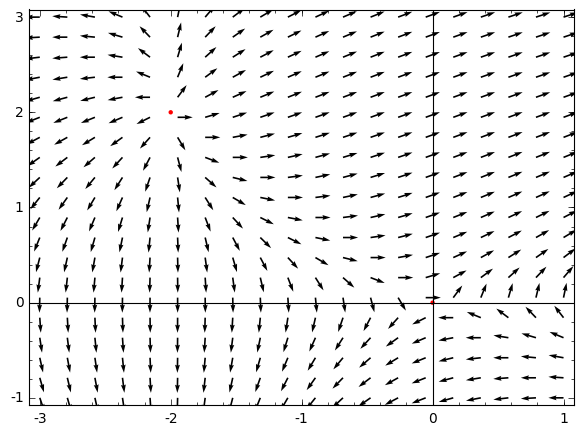

In [8]:
plt = plot_vector_field(vector(f).normalized(),(x,-3,1),(y,-1,3))
plt += point(pkts,color='red')
plt.show(figsize=6)

### 2. Obliczamy Jacobian układu w tych punktach i jego wartości i wektory własne

Klasyfikacja niezdegenerowanych punktów osobliwych:

 - **siodło** -  wartości własne macierzy ￼ Jacobiego są rzeczywiste i mają przeciwne znaki
 - **węzeł** stabilny (niestabilny), wartości własne macierzy ￼ Jacobiego są rzeczywiste i ujemne (dodatnie)

 - **ognisko**  stabilne (niestabilne), wartości własne macierzy ￼ Jacobiego są zespolone i ich części rzeczywiste są ujemne (dodatnie).

 - **centrum** jeśli wartości  własne macierzy ￼ Jacobiego są czysto urojowe.
 - **siodło–węzeł**, jeśli jedna z wartości własnych jest zero. ￼ ￼

In [28]:
show( J.subs(sols[1]) ) 

[2 0]
[1 1]

In [29]:
J.subs(sols[0]).eigenvalues(),J.subs(sols[1]).eigenvalues()

([2, -1], [1, 2])

In [30]:
J.subs(sols[0]).eigenvectors_right()

[(2, [(1, 1)], 1), (-1, [(1, -1/2)], 1)]

In [31]:
v1_1 = J.subs(sols[0]).eigenvectors_right()[0][1][0]
v1_2 = J.subs(sols[0]).eigenvectors_right()[1][1][0]
v1_1,v1_2

((1, 1), (1, -1/2))

In [32]:
v2_1 = J.subs(sols[1]).eigenvectors_right()[0][1][0]
v2_2 = J.subs(sols[1]).eigenvectors_right()[1][1][0]
v2_1,v2_2

((0, 1), (1, 1))

In [33]:
plt1 =  arrow( (0,0),v1_1/4 ) +\
        arrow( (0,0),-v1_1/4 )+\
         arrow( (0,0),v1_2/4,color='green' ) +\
        arrow( (0,0),-v1_2/4,color='green' )

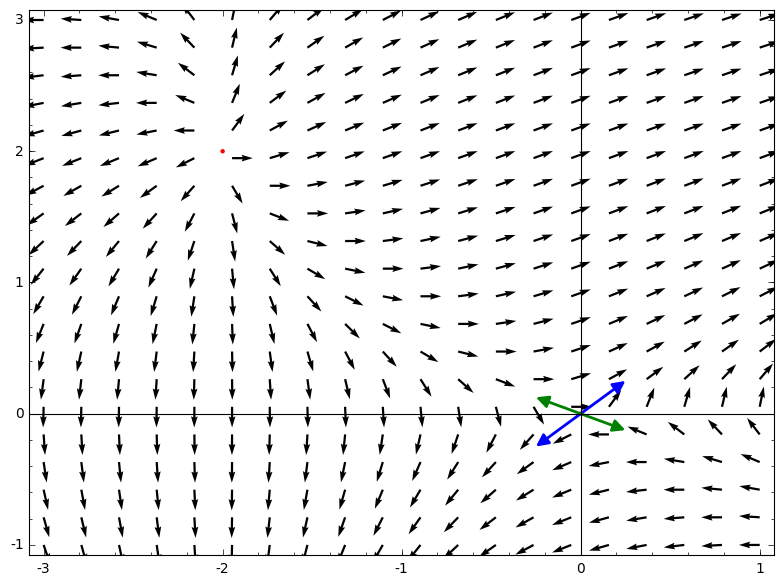

In [34]:
plt+plt1

In [35]:
plt2 =  arrow( pkts[1],pkts[1]+v2_1/4 ) +arrow( pkts[1],pkts[1]-v2_1/4 )+\
      arrow( pkts[1],pkts[1]+v2_2/4,color='green' ) +arrow( pkts[1],pkts[1]-v2_2/4,color='green' )


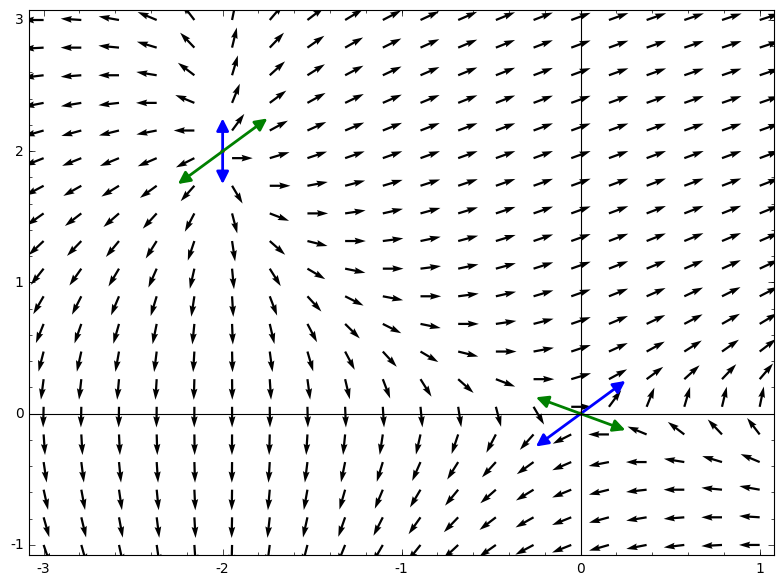

In [36]:
plt+plt2+plt1

### Rysujemy kilka trajektorii 

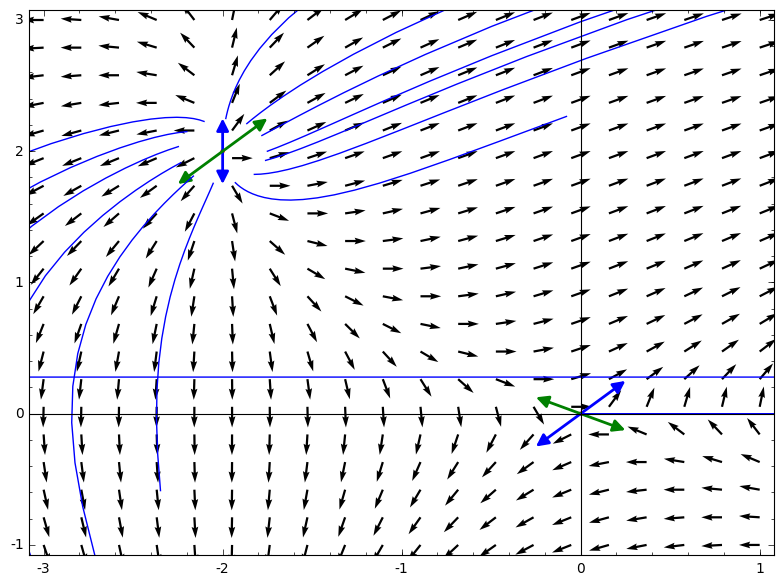

In [37]:
ts = srange(0.,2,0.1)
plt_trajs = Graphics()
for phi in srange(0,2*pi,0.5):
    s1 = desolve_odeint(f, pkts[1]+vector([cos(phi),sin(phi)])*0.25, ts, [x,y]  ) 
    plt_trajs += line(s1,xmax=1,xmin=-3,ymax=3,ymin=-1)
plt+ plt1+plt2+ plt_trajs


### 4. Znajdujemy separatrysę układu

W tym przypadku trzeba postąpić "chytrze" - wystartować z punktu siodłowego, ale wykonać symulację wstecz  ($t \to -t$), co dla układu autonomicznego jest równoważne ze zmianą znaku prawych stron układu.

In [38]:
ts = srange(0.,20,0.1)
s1 = desolve_odeint([-f[0],-f[1]], pkts[0]-v2_2*0.1, ts, [x,y]  ) 

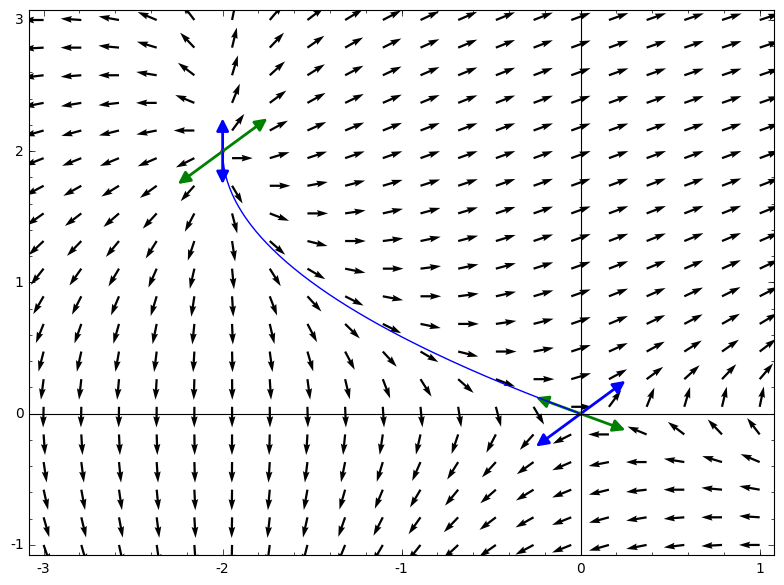

In [39]:
plt+ plt1+plt2+line(s1,ymin=-1)